In [142]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy.stats import linregress




In [143]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Maximum Ablation 

Grounding Line Plot - Amin = -13


In [144]:
gl_run_title_amin13 = str("Grounding Line Evolution Over Time - Max Ablation = -13 m/yr")
amin13 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/amin_tests/DATA_Dictionary_2025_05_02__18_03_08_amin13.pkl.gz"
with gzip.open(amin13, 'rb') as f:
    DATA_dict_amin13 = pickle.load(f)

In [145]:
bed_dict13 = DATA_dict_amin13['bed_dict']
base_dict = DATA_dict_amin13['base_dict']
surf_dict= DATA_dict_amin13 ['surf_dict']
sed_dict = DATA_dict_amin13['sed_dict']
H_dict = DATA_dict_amin13['H_dict']
us_dict13 = DATA_dict_amin13['us_dict']
ub_dict = DATA_dict_amin13['ub_dict']
Hs_dict = DATA_dict_amin13['Hs_dict']
GL_dict = DATA_dict_amin13['GL_dict']
Qs_dict = DATA_dict_amin13['Qs_dict']

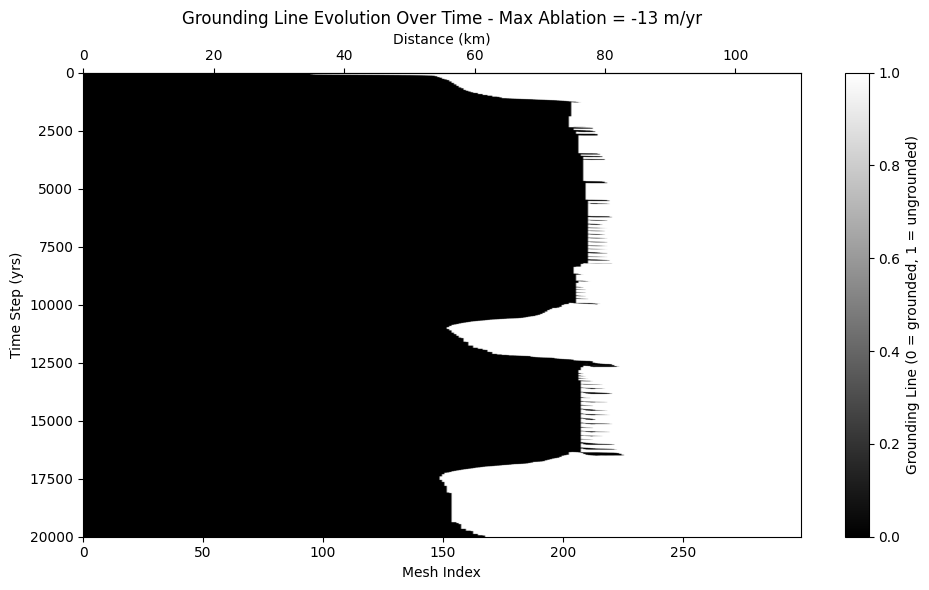

In [146]:
GL_dict = DATA_dict_amin13['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin13)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [147]:
gl_positions_amin13 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin13.append(idx)

gl_positions_amin13 = np.array(gl_positions_amin13)
GL_km_amin13 = mesh_index_to_km(gl_positions_amin13)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_amin13 = GL_km_amin13[mask]


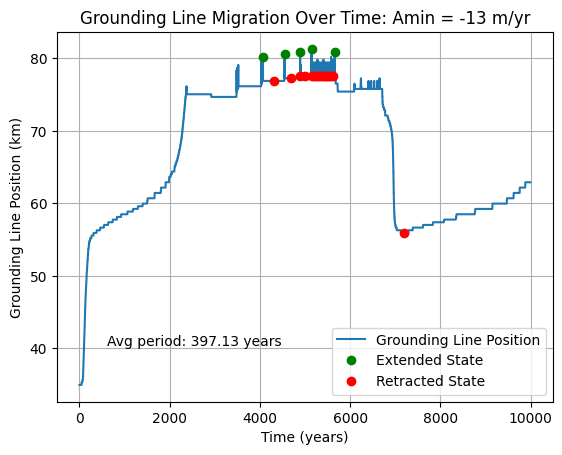

Mean cycle period: 397.13 years
[478.40249788 345.00501429 252.46259997 512.66243518]
Mean advance amplitude: 80.79 km
[80.2006689  80.56856187 80.93645485 81.30434783 80.93645485]
Mean retreat amplitude: 76.28 km
[76.88963211 77.25752508 77.62541806 77.62541806 77.62541806 77.62541806
 77.62541806 77.62541806 77.62541806 77.62541806 77.62541806 77.62541806
 77.62541806 77.62541806 77.62541806 77.62541806 55.91973244]


In [148]:
peaks_amin13, _ = find_peaks(GL_km_amin13, prominence=3) 
troughs_amin13, _ = find_peaks(-GL_km_amin13, prominence=3)     
periods_amin13 = np.diff(np.array(time)[peaks_amin13])
adv_dists_amin13 = GL_km_amin13[peaks_amin13]
ret_dists_amin13 = GL_km_amin13[troughs_amin13]


plt.plot(time, GL_km_amin13, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin13], GL_km_amin13[peaks_amin13], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin13], GL_km_amin13[troughs_amin13], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin13):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -13 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin13):.2f} years")
print(periods_amin13)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin13):.2f} km")
print(adv_dists_amin13)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin13):.2f} km")
print(ret_dists_amin13)


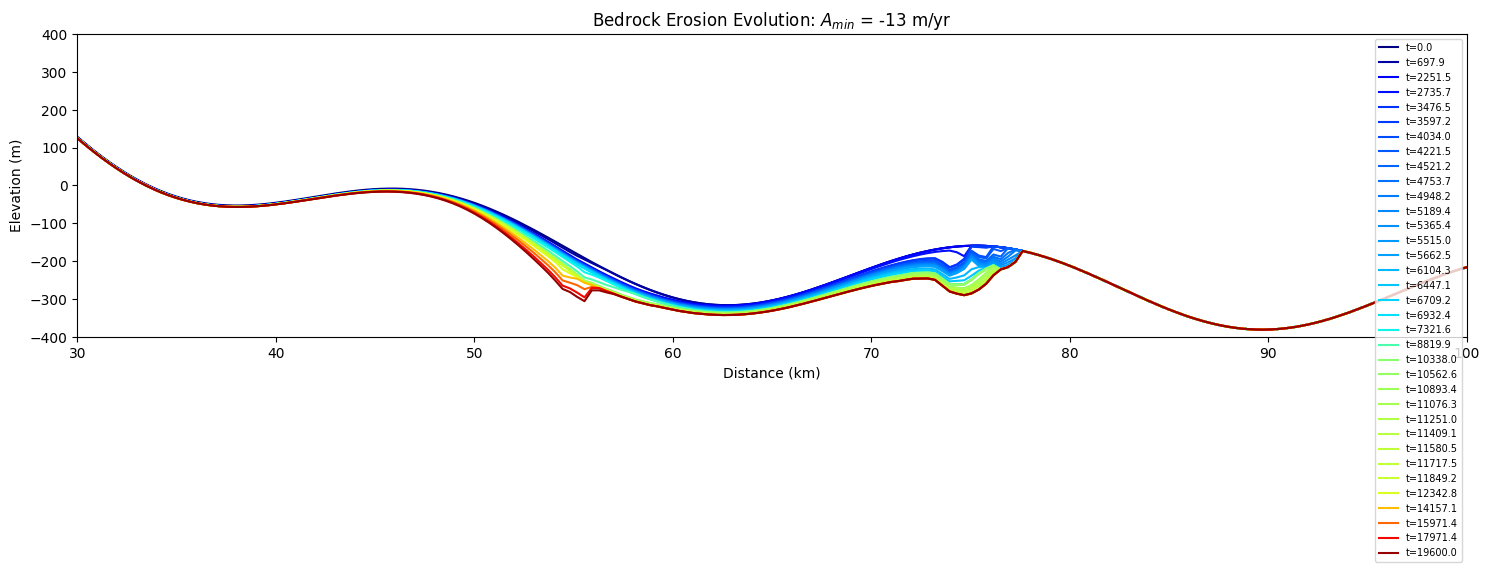

In [149]:
bed_dict = DATA_dict_amin13['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{min}$ = -13 m/yr")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/Bedrock_Evo_amin13.svg", format ="svg", bbox_inches='tight')

2832.392538585387


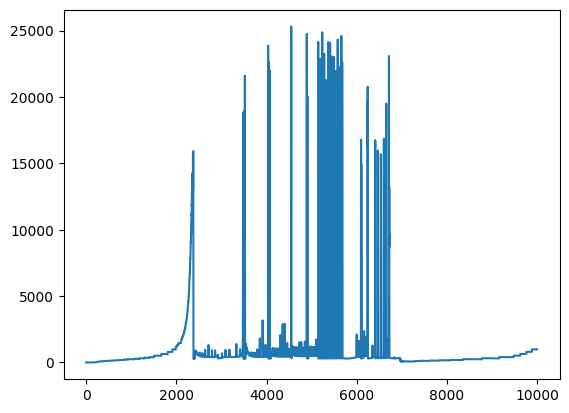

In [150]:
max_Qs_13 = np.array([max(values) for values in Qs_dict.values()])
time_13 = np.array(list(Qs_dict.keys()))

mask = time_13 <= 10000

time_13 = time_13[mask]
max_Qs_13 = max_Qs_13[mask]
plt.plot(time_13, max_Qs_13)
MAX_13 = np.max(max_Qs_13)
MAX_13 = np.mean(max_Qs_13)
print(MAX_13)

Grounding Line Plot - Amin = -14


In [151]:
gl_run_title_amin14 = str("Grounding Line Evolution Over Time - Max Ablation = -14 m/yr")
amin14 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/amin_tests/DATA_Dictionary_2025_05_02__20_02_43_amin14.pkl.gz"
with gzip.open(amin14, 'rb') as f:
    DATA_dict_amin14 = pickle.load(f)

In [152]:
bed_dict = DATA_dict_amin14['bed_dict']
base_dict = DATA_dict_amin14['base_dict']
surf_dict= DATA_dict_amin14 ['surf_dict']
sed_dict = DATA_dict_amin14['sed_dict']
H_dict = DATA_dict_amin14['H_dict']
us_dict_14 = DATA_dict_amin14['us_dict']
ub_dict_14 = DATA_dict_amin14['ub_dict']
Hs_dict = DATA_dict_amin14['Hs_dict']
GL_dict = DATA_dict_amin14['GL_dict']
Qs_dict = DATA_dict_amin14['Qs_dict']

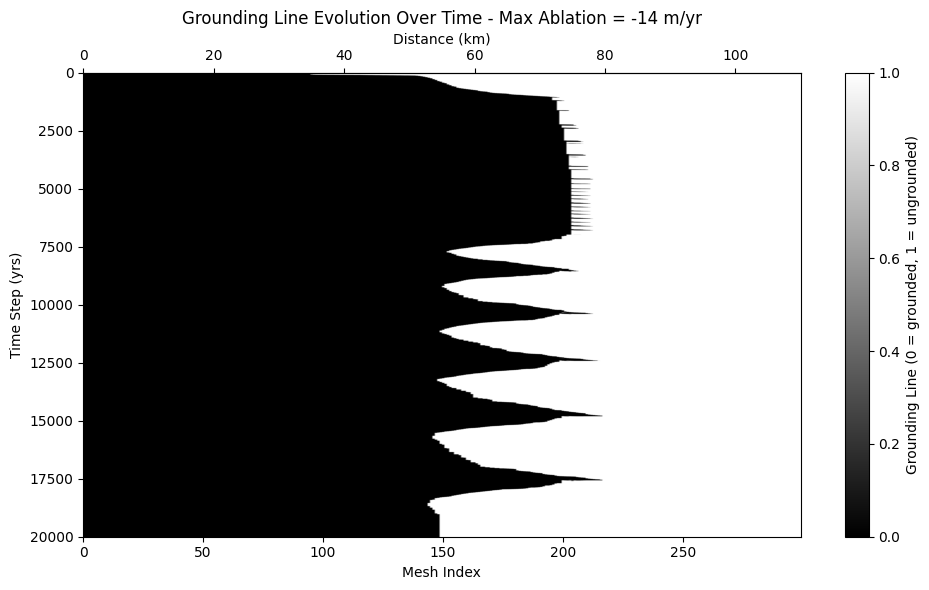

In [153]:
GL_dict = DATA_dict_amin14['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin14)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [154]:
gl_positions_amin14 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin14.append(idx)

gl_positions_amin14 = np.array(gl_positions_amin14)
GL_km_amin14 = mesh_index_to_km(gl_positions_amin14)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_amin14 = GL_km_amin14[mask]


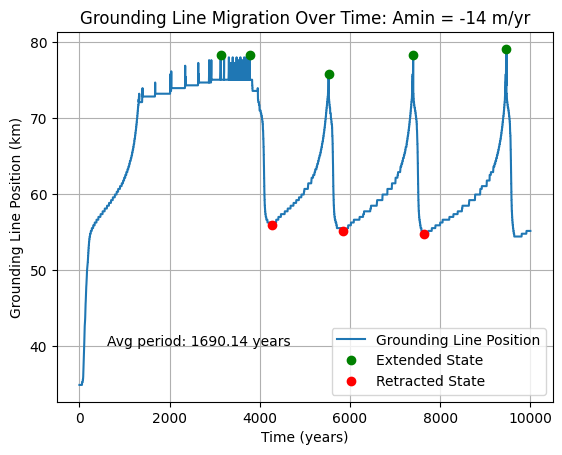

Mean cycle period: 1690.14 years
[1584.68642602 1795.58453457]
Mean advance amplitude: 77.99 km
[78.36120401 78.36120401 75.78595318 78.36120401 79.09698997]
Mean retreat amplitude: 55.31 km
[55.91973244 55.18394649 54.81605351]


In [155]:
peaks_amin14, _ = find_peaks(GL_km_amin14, prominence=10, distance = 1000) 
troughs_amin14, _ = find_peaks(-GL_km_amin14, prominence=10)     
periods_amin14 = np.diff(np.array(time)[troughs_amin14])
adv_dists_amin14 = GL_km_amin14[peaks_amin14]
ret_dists_amin14 = GL_km_amin14[troughs_amin14]


plt.plot(time, GL_km_amin14, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin14], GL_km_amin14[peaks_amin14], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin14], GL_km_amin14[troughs_amin14], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin14):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -14 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin14):.2f} years")
print(periods_amin14)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin14):.2f} km")
print(adv_dists_amin14)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin14):.2f} km")
print(ret_dists_amin14)


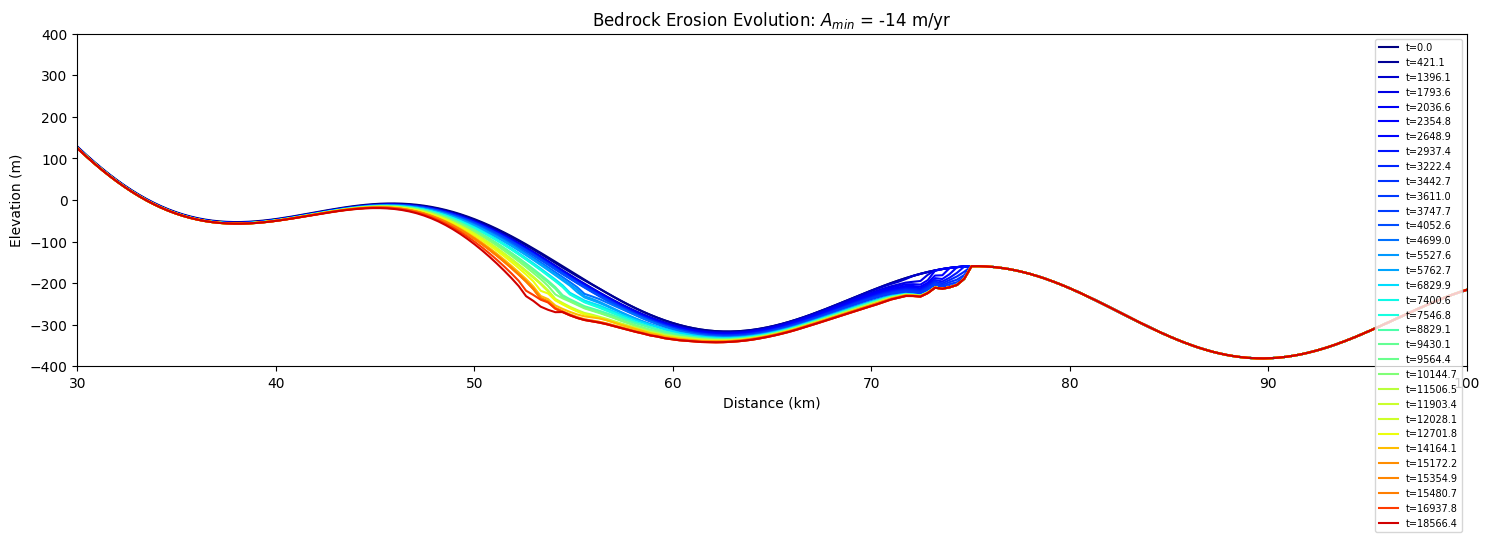

In [156]:
bed_dict = DATA_dict_amin14['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{min}$ = -14 m/yr")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/Bedrock_Evo_amin13.svg", format ="svg", bbox_inches='tight')

22248.983493237258


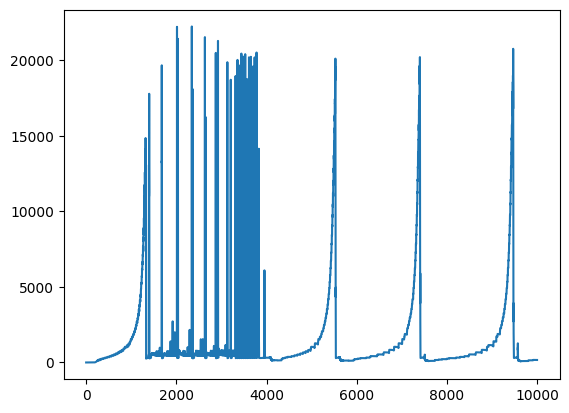

In [157]:
max_Qs_14 = np.array([max(values) for values in Qs_dict.values()])
time_14 = np.array(list(Qs_dict.keys()))

mask = time_14 <= 10000

time_14 = time_14[mask]
max_Qs_14 = max_Qs_14[mask]
plt.plot(time_14, max_Qs_14)
MAX_14 = np.max(max_Qs_14)
MAX_14 = np.max(max_Qs_14)
print(MAX_14)

Grounding Line Plot - Amin = -15


In [158]:
gl_run_title_amin15 = str("Grounding Line Evolution Over Time - Max Ablation = -15 m/yr")
amin15 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/amin_tests/DATA_Dictionary_2025_05_02__22_29_14_amin15.pkl.gz"
with gzip.open(amin15, 'rb') as f:
    DATA_dict_amin15 = pickle.load(f)

In [159]:
bed_dict = DATA_dict_amin15['bed_dict']
base_dict = DATA_dict_amin15['base_dict']
surf_dict= DATA_dict_amin15 ['surf_dict']
sed_dict = DATA_dict_amin15['sed_dict']
H_dict = DATA_dict_amin15['H_dict']
us_dict_15 = DATA_dict_amin15['us_dict']
ub_dict_15 = DATA_dict_amin15['ub_dict']
Hs_dict = DATA_dict_amin15['Hs_dict']
GL_dict = DATA_dict_amin15['GL_dict']
Qs_dict = DATA_dict_amin15['Qs_dict']

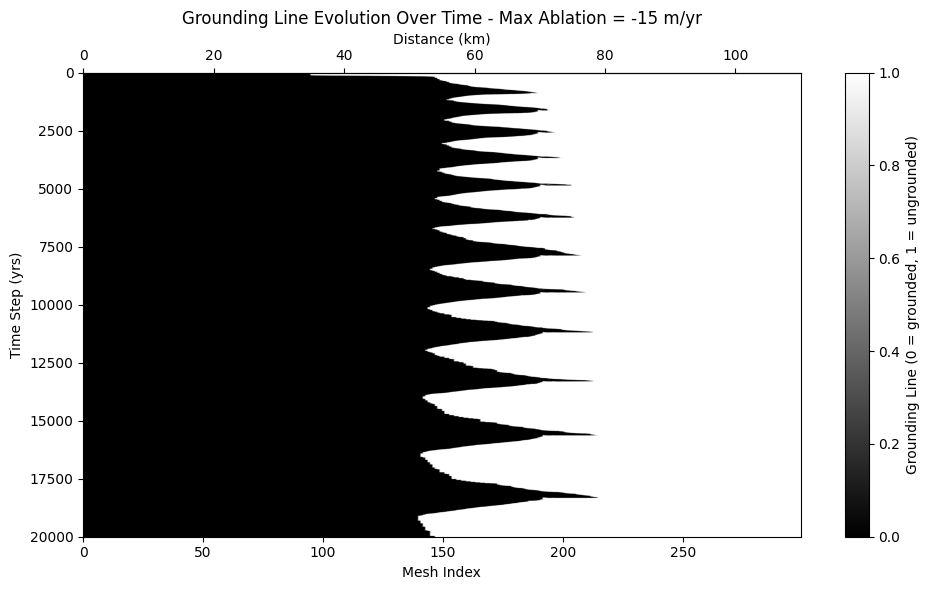

In [160]:
GL_dict = DATA_dict_amin15['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin15)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [161]:
gl_positions_amin15 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin15.append(idx)

gl_positions_amin15 = np.array(gl_positions_amin15)
GL_km_amin15 = mesh_index_to_km(gl_positions_amin15)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_amin15 = GL_km_amin15[mask]


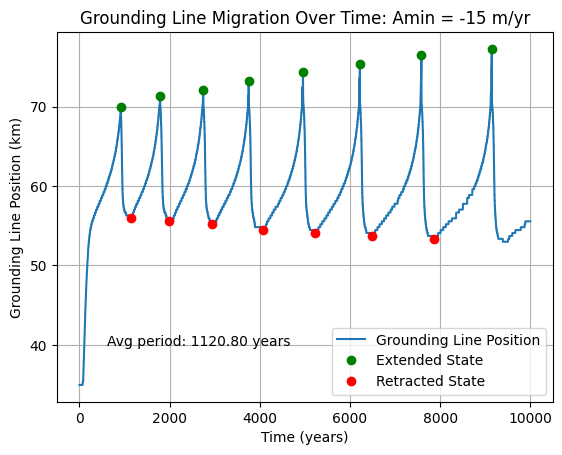

Mean cycle period: 1120.80 years
[ 855.84054782  956.34375565 1129.09783001 1147.72813618 1271.62752264
 1364.16441771]
Mean advance amplitude: 73.76 km
[69.89966555 71.37123746 72.10702341 73.21070234 74.31438127 75.4180602
 76.52173913 77.25752508]
Mean retreat amplitude: 54.61 km
[55.91973244 55.55183946 55.18394649 54.44816054 54.08026756 53.71237458
 53.34448161]


In [162]:
peaks_amin15, _ = find_peaks(GL_km_amin15, prominence=10) 
troughs_amin15, _ = find_peaks(-GL_km_amin15, prominence=10)     
periods_amin15 = np.diff(np.array(time)[troughs_amin15])
adv_dists_amin15 = GL_km_amin15[peaks_amin15]
ret_dists_amin15 = GL_km_amin15[troughs_amin15]


plt.plot(time, GL_km_amin15, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin15], GL_km_amin15[peaks_amin15], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin15], GL_km_amin15[troughs_amin15], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin15):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -15 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin15):.2f} years")
print(periods_amin15)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin15):.2f} km")
print(adv_dists_amin15)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin15):.2f} km")
print(ret_dists_amin15)


18771.915528958154


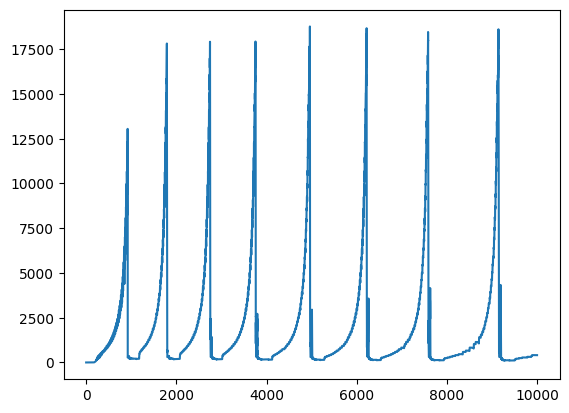

In [163]:
max_Qs_15 = np.array([max(values) for values in Qs_dict.values()])
time_15 = np.array(list(Qs_dict.keys()))

mask = time_15 <= 10000

time_15 = time_15[mask]
max_Qs_15 = max_Qs_15[mask]
plt.plot(time_15, max_Qs_15)
MAX_15 = np.max(max_Qs_15)
MAX_15 = np.max(max_Qs_15)
print(MAX_15)

Grounding Line Plot - Amin = -16


In [164]:
gl_run_title_amin16 = str("Grounding Line Evolution Over Time - Max Ablation = -16 m/yr")
amin16 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/amin_tests/DATA_Dictionary_2025_05_03__02_07_22_amin16.pkl.gz"
with gzip.open(amin16, 'rb') as f:
    DATA_dict_amin16 = pickle.load(f)

In [165]:
bed_dict = DATA_dict_amin16['bed_dict']
base_dict = DATA_dict_amin16['base_dict']
surf_dict= DATA_dict_amin16 ['surf_dict']
sed_dict = DATA_dict_amin16['sed_dict']
H_dict = DATA_dict_amin16['H_dict']
us_dict_16 = DATA_dict_amin16['us_dict']
ub_dict_16 = DATA_dict_amin16['ub_dict']
Hs_dict = DATA_dict_amin16['Hs_dict']
GL_dict = DATA_dict_amin16['GL_dict']
Qs_dict = DATA_dict_amin16['Qs_dict']

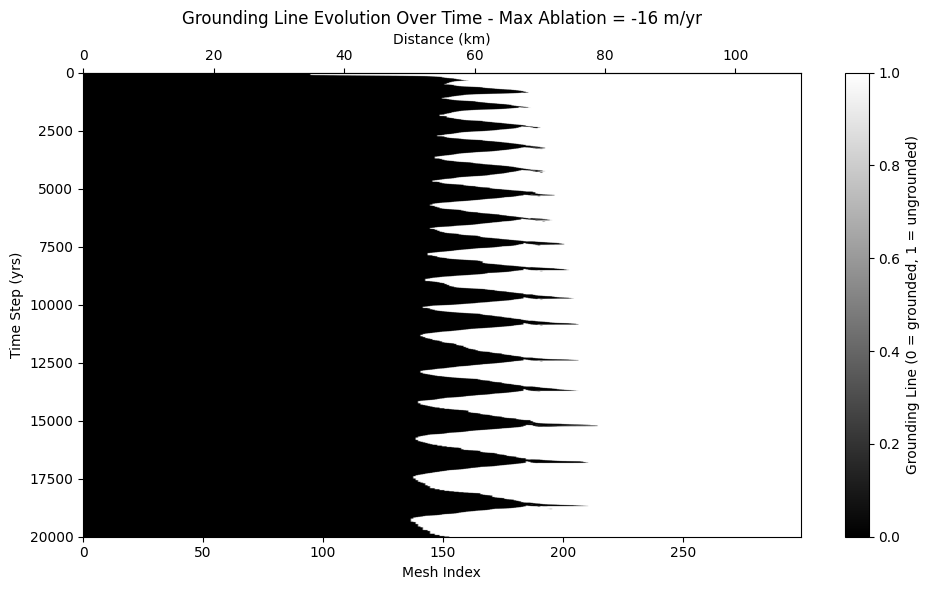

In [166]:
GL_dict = DATA_dict_amin16['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin16)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [167]:
gl_positions_amin16 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin16.append(idx)

gl_positions_amin16 = np.array(gl_positions_amin16)
GL_km_amin16 = mesh_index_to_km(gl_positions_amin16)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_amin16 = GL_km_amin16[mask]


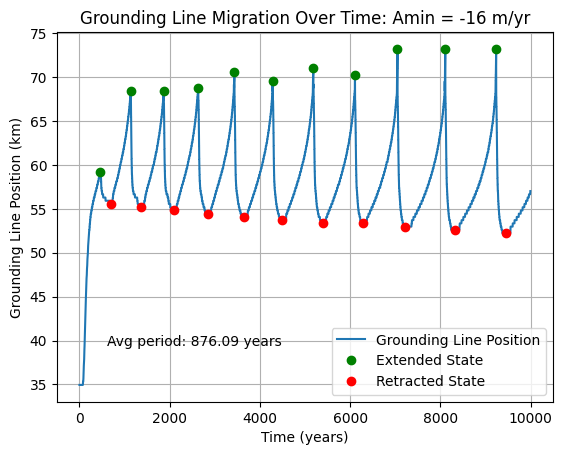

Mean cycle period: 876.09 years
[ 674.60801648  721.10593334  755.54657117  808.58369559  835.96918
  911.25251579  878.57957437  932.10549817 1105.41872961 1137.69453322]
Mean advance amplitude: 69.63 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.00334448 70.26755853 73.21070234 73.21070234 73.21070234]
Mean retreat amplitude: 53.85 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863 52.60869565 52.24080268]


In [168]:
peaks_amin16, _ = find_peaks(GL_km_amin16, prominence=3) 
troughs_amin16, _ = find_peaks(-GL_km_amin16, prominence=3)     
periods_amin16 = np.diff(np.array(time)[troughs_amin16])
adv_dists_amin16 = GL_km_amin16[peaks_amin16]
ret_dists_amin16 = GL_km_amin16[troughs_amin16]


plt.plot(time, GL_km_amin16, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin16], GL_km_amin16[peaks_amin16], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin16], GL_km_amin16[troughs_amin16], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin16):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -16 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin16):.2f} years")
print(periods_amin16)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin16):.2f} km")
print(adv_dists_amin16)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin16):.2f} km")
print(ret_dists_amin16)


19499.426505518742


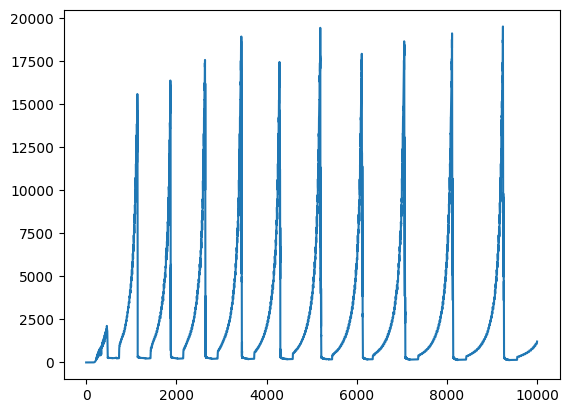

In [169]:
max_Qs_16 = np.array([max(values) for values in Qs_dict.values()])
time_16 = np.array(list(Qs_dict.keys()))

mask = time_16 <= 10000

time_16 = time_16[mask]
max_Qs_16 = max_Qs_16[mask]
plt.plot(time_16, max_Qs_16)
MAX_16 = np.max(max_Qs_16)

MAX_16 = np.max(max_Qs_16)
print(MAX_16)

Grounding Line Plot - Amin = -17


In [170]:
gl_run_title_amin17 = str("Grounding Line Evolution Over Time - Max Ablation = -17 m/yr")
amin17 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/amin_tests/DATA_Dictionary_2025_05_03__11_22_12_amin17.pkl.gz"
with gzip.open(amin17, 'rb') as f:
    DATA_dict_amin17 = pickle.load(f)

In [171]:
bed_dict = DATA_dict_amin17['bed_dict']
base_dict = DATA_dict_amin17['base_dict']
surf_dict= DATA_dict_amin17 ['surf_dict']
sed_dict = DATA_dict_amin17['sed_dict']
H_dict = DATA_dict_amin17['H_dict']
us_dict_17 = DATA_dict_amin17['us_dict']
ub_dict_17 = DATA_dict_amin17['ub_dict']
Hs_dict = DATA_dict_amin17['Hs_dict']
GL_dict = DATA_dict_amin17['GL_dict']
Qs_dict = DATA_dict_amin17['Qs_dict']

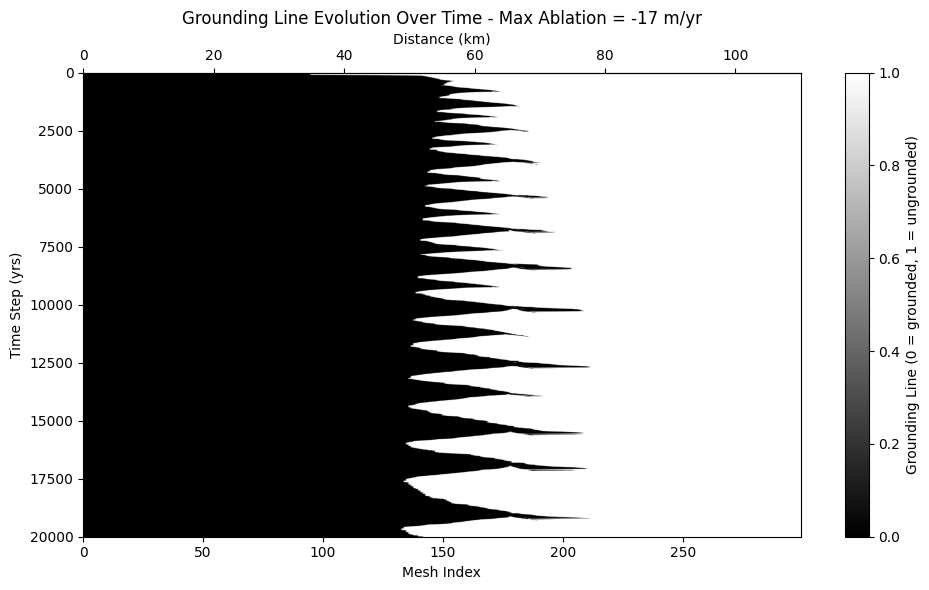

In [172]:
GL_dict = DATA_dict_amin17['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin17)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [173]:
gl_positions_amin17 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin17.append(idx)

gl_positions_amin17 = np.array(gl_positions_amin17)
GL_km_amin17 = mesh_index_to_km(gl_positions_amin17)
mask = np.array(time) <= 10000
time = np.array(time)[mask]
GL_km_amin17 = GL_km_amin17[mask]


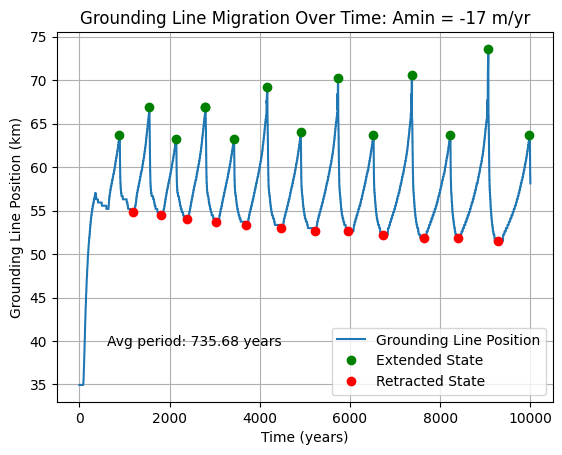

Mean cycle period: 735.68 years
[618.03386055 570.33484832 655.10470997 669.51881387 777.18187856
 741.49291673 735.69947862 785.88593567 892.54888721 772.23233347
 874.42018382]
Mean advance amplitude: 66.40 km
[63.64548495 66.95652174 63.27759197 66.95652174 66.95652174 63.27759197
 69.1638796  64.01337793 70.26755853 63.64548495 70.63545151 63.64548495
 73.57859532 63.64548495]
Mean retreat amplitude: 53.01 km
[54.81605351 54.44816054 54.08026756 53.71237458 53.34448161 52.97658863
 52.60869565 52.60869565 52.24080268 51.8729097  51.8729097  51.50501672]


In [174]:
peaks_amin17, _ = find_peaks(GL_km_amin17, prominence=4) 
troughs_amin17, _ = find_peaks(-GL_km_amin17, prominence=4)     
periods_amin17 = np.diff(np.array(time)[troughs_amin17])
adv_dists_amin17 = GL_km_amin17[peaks_amin17]
ret_dists_amin17 = GL_km_amin17[troughs_amin17]


plt.plot(time, GL_km_amin17, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin17], GL_km_amin17[peaks_amin17], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin17], GL_km_amin17[troughs_amin17], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin17):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -17 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin17):.2f} years")
print(periods_amin17)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin17):.2f} km")
print(adv_dists_amin17)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin17):.2f} km")
print(ret_dists_amin17)


21000.055960044207


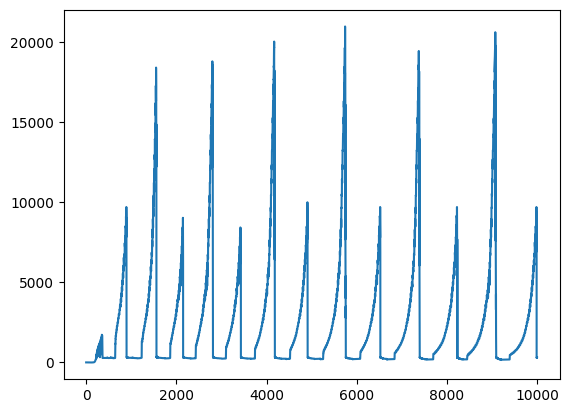

In [175]:
max_Qs_17 = np.array([max(values) for values in Qs_dict.values()])
time_17 = np.array(list(Qs_dict.keys()))

mask = time_17 <= 10000

time_17 = time_17[mask]
max_Qs_17 = max_Qs_17[mask]
plt.plot(time_17, max_Qs_17)
MAX_17 = np.max(max_Qs_17)

MAX_17 = np.max(max_Qs_17)
print(MAX_17)

Grounding Line Plot - Amin = -18


In [176]:
gl_run_title_amin18 = str("Grounding Line Evolution Over Time - Max Ablation = -18 m/yr")
amin18 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__00_04_25.pkl.gz"
with gzip.open(amin18, 'rb') as f:
    DATA_dict_amin18 = pickle.load(f)

In [177]:
bed_dict = DATA_dict_amin18['bed_dict']
base_dict = DATA_dict_amin18['base_dict']
surf_dict= DATA_dict_amin18 ['surf_dict']
sed_dict = DATA_dict_amin18['sed_dict']
H_dict = DATA_dict_amin18['H_dict']
us_dict_18 = DATA_dict_amin18['us_dict']
ub_dict_18 = DATA_dict_amin18['ub_dict']
Hs_dict = DATA_dict_amin18['Hs_dict']
GL_dict = DATA_dict_amin18['GL_dict']
Qs_dict= DATA_dict_amin18['Qs_dict']

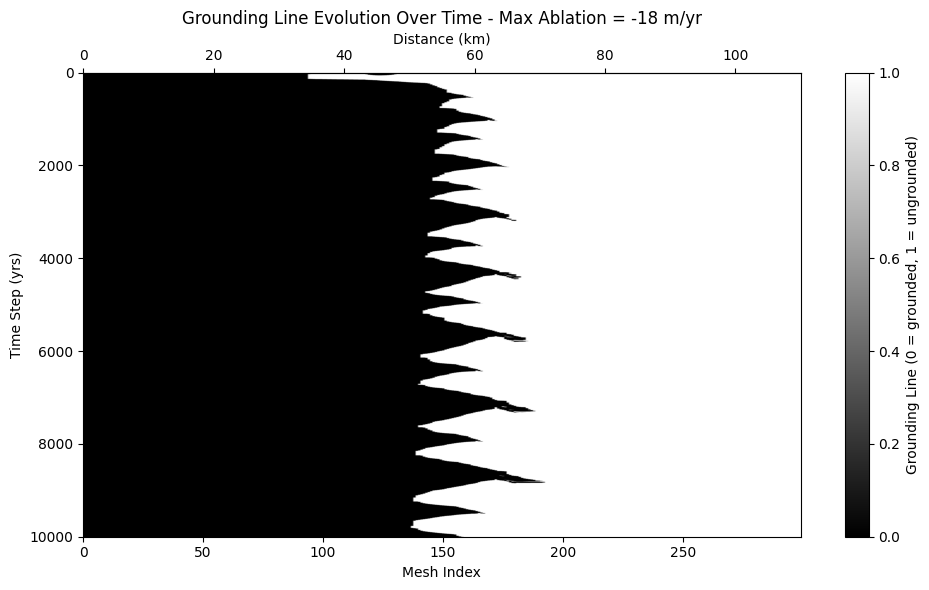

In [178]:
GL_dict = DATA_dict_amin18['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin18)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [179]:
gl_positions_amin18 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin18.append(idx)

gl_positions_amin18 = np.array(gl_positions_amin18)
GL_km_amin18 = mesh_index_to_km(gl_positions_amin18)



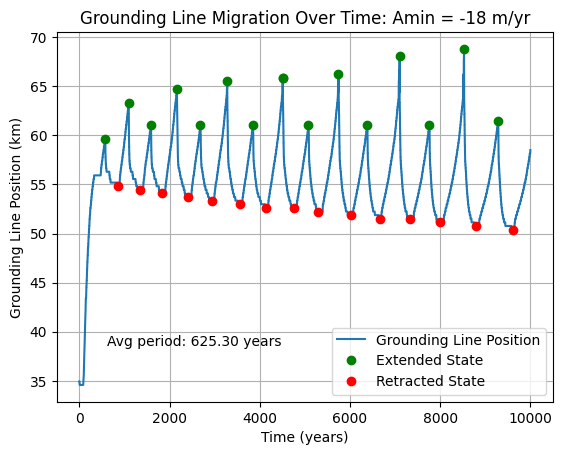

Mean cycle period: 625.30 years
[495.85686488 480.70014623 584.78978575 516.83254846 634.61218773
 574.01553151 618.21328219 528.88775769 731.40009247 644.19260464
 677.71004859 659.58359517 805.03730173 802.39859198]
Mean advance amplitude: 63.48 km
[59.59866221 63.27759197 61.07023411 64.74916388 61.07023411 65.48494983
 61.07023411 65.85284281 65.85284281 61.07023411 66.22073579 61.07023411
 68.06020067 61.07023411 68.79598662 61.43812709]
Mean retreat amplitude: 52.54 km
[54.81605351 54.44816054 54.08026756 53.71237458 53.34448161 52.97658863
 52.60869565 52.60869565 52.24080268 51.8729097  51.50501672 51.50501672
 51.13712375 50.76923077 50.40133779]


In [180]:
peaks_amin18, _ = find_peaks(GL_km_amin18, prominence=3) 
troughs_amin18, _ = find_peaks(-GL_km_amin18, prominence=3)     
periods_amin18 = np.diff(np.array(time)[troughs_amin18])
adv_dists_amin18 = GL_km_amin18[peaks_amin18]
ret_dists_amin18 = GL_km_amin18[troughs_amin18]


plt.plot(time, GL_km_amin18, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin18], GL_km_amin18[peaks_amin18], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin18], GL_km_amin18[troughs_amin18], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin18):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -18 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin18):.2f} years")
print(periods_amin18)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin18):.2f} km")
print(adv_dists_amin18)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin18):.2f} km")
print(ret_dists_amin18)


20231.2251670127


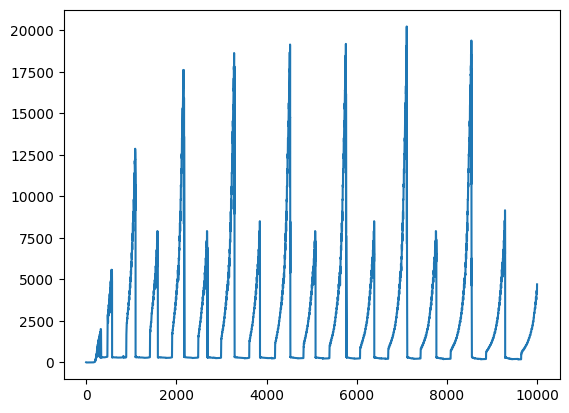

In [181]:
max_Qs_18 = np.array([max(values) for values in Qs_dict.values()])
time_18 = np.array(list(Qs_dict.keys()))

mask = time_18 <= 10000

time_18 = time_18[mask]
max_Qs_18 = max_Qs_18[mask]
plt.plot(time_18, max_Qs_18)
MAX_18 = np.max(max_Qs_18)

print(MAX_18)

Grounding Line Plot - Amin = -19


In [182]:
gl_run_title_amin19 = str("Grounding Line Evolution Over Time - Max Ablation = -19 m/yr")
amin19 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__10_14_18.pkl.gz"
with gzip.open(amin19, 'rb') as f:
    DATA_dict_amin19 = pickle.load(f)

In [183]:
bed_dict = DATA_dict_amin19['bed_dict']
base_dict = DATA_dict_amin19['base_dict']
surf_dict= DATA_dict_amin19 ['surf_dict']
sed_dict = DATA_dict_amin19['sed_dict']
H_dict = DATA_dict_amin19['H_dict']
us_dict_19 = DATA_dict_amin19['us_dict']
ub_dict_19 = DATA_dict_amin19['ub_dict']
Hs_dict = DATA_dict_amin19['Hs_dict']
GL_dict = DATA_dict_amin19['GL_dict']
Qs_dict = DATA_dict_amin19['Qs_dict']

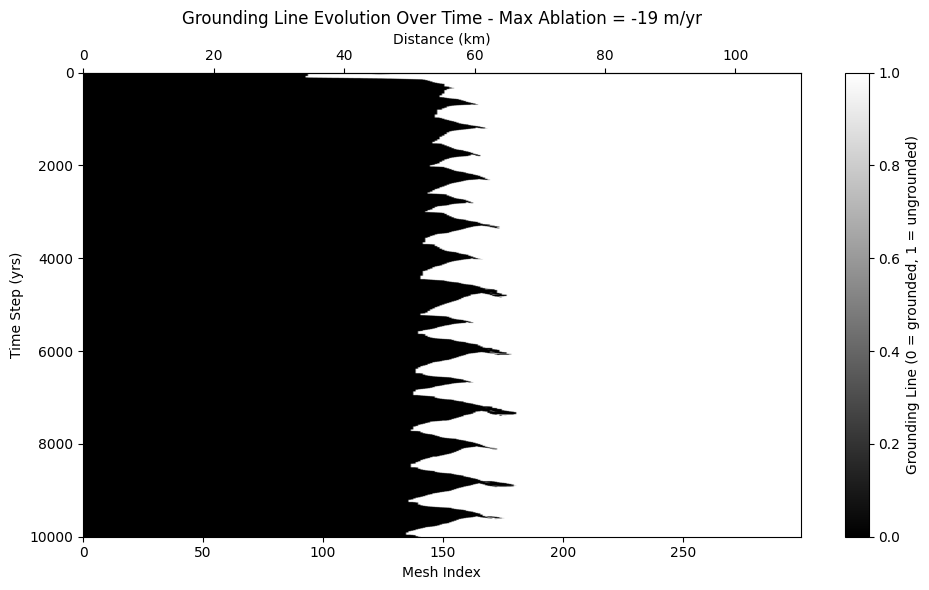

In [184]:
GL_dict = DATA_dict_amin19['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin19)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [185]:
gl_positions_amin19 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin19.append(idx)

gl_positions_amin19 = np.array(gl_positions_amin19)
GL_km_amin19 = mesh_index_to_km(gl_positions_amin19)



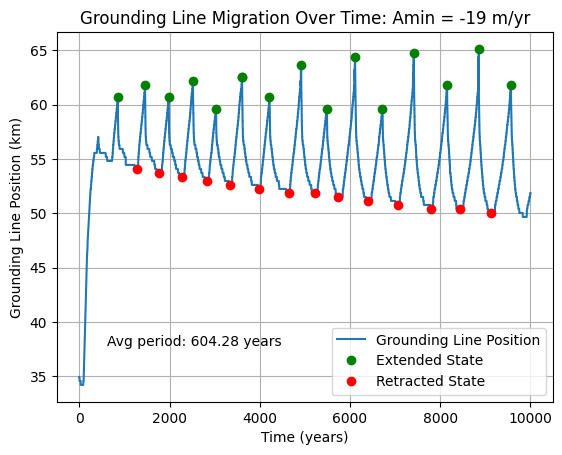

Mean cycle period: 604.28 years
[493.28309509 509.55121412 554.76211617 521.17667537 627.10573011
 663.75925125 574.79599008 520.06689694 668.10926459 664.15041395
 736.67797509 636.1042205  686.14637238]
Mean advance amplitude: 61.97 km
[60.70234114 61.80602007 60.70234114 62.17391304 59.59866221 62.54180602
 62.54180602 60.70234114 63.64548495 59.59866221 64.3812709  59.59866221
 64.74916388 61.80602007 65.11705686 61.80602007]
Mean retreat amplitude: 51.93 km
[54.08026756 53.71237458 53.34448161 52.97658863 52.60869565 52.24080268
 51.8729097  51.8729097  51.50501672 51.13712375 50.76923077 50.40133779
 50.40133779 50.03344482]


In [186]:
peaks_amin19, _ = find_peaks(GL_km_amin19, prominence=3) 
troughs_amin19, _ = find_peaks(-GL_km_amin19, prominence=3)     
periods_amin19 = np.diff(np.array(time)[troughs_amin19])
adv_dists_amin19 = GL_km_amin19[peaks_amin19]
ret_dists_amin19 = GL_km_amin19[troughs_amin19]


plt.plot(time, GL_km_amin19, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin19], GL_km_amin19[peaks_amin19], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin19], GL_km_amin19[troughs_amin19], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin19):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -19 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin19):.2f} years")
print(periods_amin19)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin19):.2f} km")
print(adv_dists_amin19)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin19):.2f} km")
print(ret_dists_amin19)


18831.823762462365


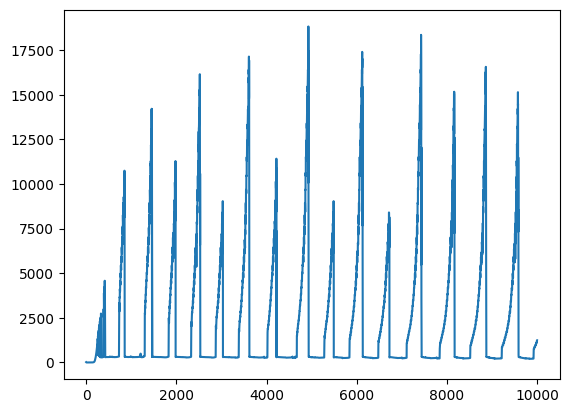

In [187]:
max_Qs_19 = np.array([max(values) for values in Qs_dict.values()])
time_19 = np.array(list(Qs_dict.keys()))

mask = time_19 <= 10000

time_19 = time_19[mask]
max_Qs_19 = max_Qs_19[mask]
plt.plot(time_19, max_Qs_19)
MAX_19 = np.max(max_Qs_19)

MAX_19 = np.max(max_Qs_19)
print(MAX_19)

Grounding Line Plot - Amin = -20


In [188]:
gl_run_title_amin20 = str("Grounding Line Evolution Over Time - Max Ablation = -20 m/yr")
amin20 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__11_32_03.pkl.gz"
with gzip.open(amin20, 'rb') as f:
    DATA_dict_amin20 = pickle.load(f)

In [189]:
bed_dict = DATA_dict_amin20['bed_dict']
base_dict = DATA_dict_amin20['base_dict']
surf_dict= DATA_dict_amin20 ['surf_dict']
sed_dict = DATA_dict_amin20['sed_dict']
H_dict = DATA_dict_amin20['H_dict']
us_dict_20 = DATA_dict_amin20['us_dict']
ub_dict_20 = DATA_dict_amin20['ub_dict']
Hs_dict = DATA_dict_amin20['Hs_dict']
GL_dict = DATA_dict_amin20['GL_dict']
Qs_dict = DATA_dict_amin20['Qs_dict']

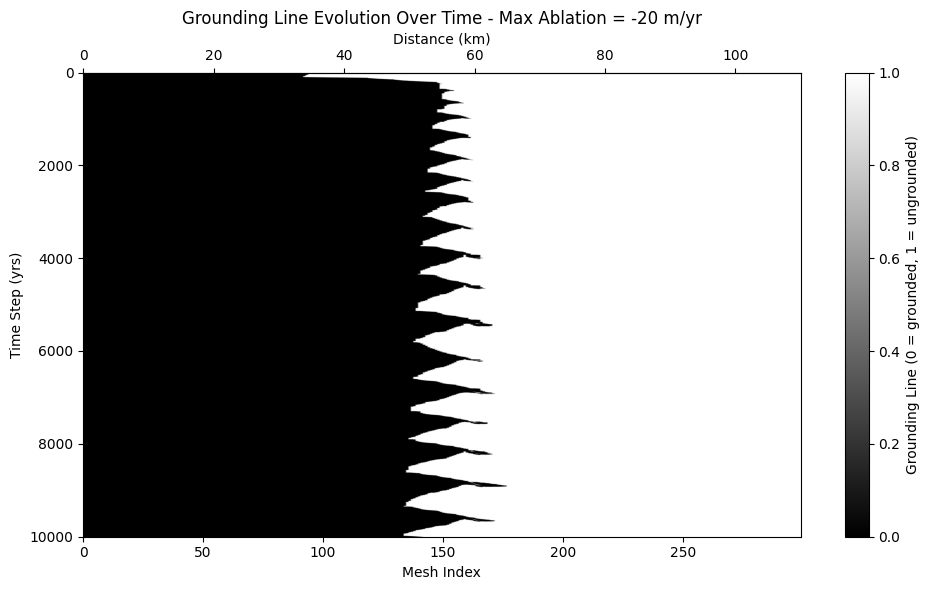

In [190]:
GL_dict = DATA_dict_amin20['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin20)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [191]:
gl_positions_amin20 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin20.append(idx)

gl_positions_amin20 = np.array(gl_positions_amin20)
GL_km_amin20 = mesh_index_to_km(gl_positions_amin20)



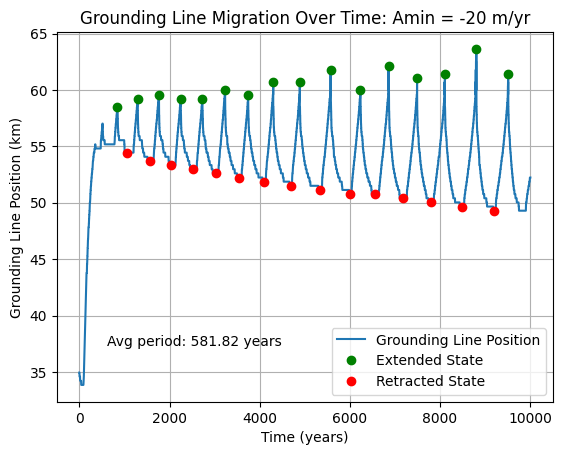

Mean cycle period: 581.82 years
[513.57469881 445.36882708 498.85118066 500.53449426 528.87859484
 538.59194414 597.59117784 662.74034662 654.62233083 548.4518435
 619.56016284 632.0000974  691.7241769  713.00993822]
Mean advance amplitude: 60.52 km
[58.49498328 59.23076923 59.59866221 59.23076923 59.23076923 59.96655518
 59.59866221 60.70234114 60.70234114 61.80602007 59.96655518 62.17391304
 61.07023411 61.43812709 63.64548495 61.43812709]
Mean retreat amplitude: 51.65 km
[54.44816054 53.71237458 53.34448161 52.97658863 52.60869565 52.24080268
 51.8729097  51.50501672 51.13712375 50.76923077 50.76923077 50.40133779
 50.03344482 49.66555184 49.29765886]


In [192]:
peaks_amin20, _ = find_peaks(GL_km_amin20, prominence=3) 
troughs_amin20, _ = find_peaks(-GL_km_amin20, prominence=3)     
periods_amin20 = np.diff(np.array(time)[troughs_amin20])
adv_dists_amin20 = GL_km_amin20[peaks_amin20]
ret_dists_amin20 = GL_km_amin20[troughs_amin20]


plt.plot(time, GL_km_amin20, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin20], GL_km_amin20[peaks_amin20], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin20], GL_km_amin20[troughs_amin20], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin20):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -20 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin20):.2f} years")
print(periods_amin20)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin20):.2f} km")
print(adv_dists_amin20)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin20):.2f} km")
print(ret_dists_amin20)


15614.23340885585


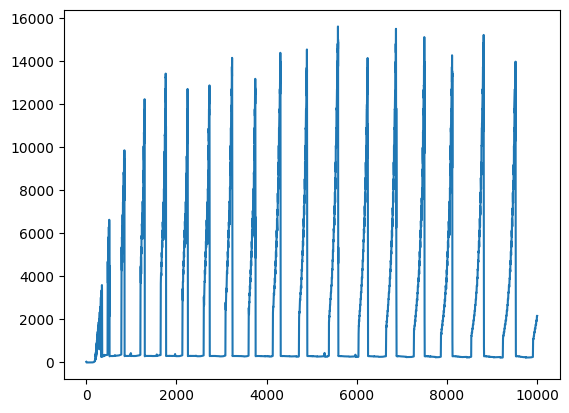

In [193]:
max_Qs_20 = np.array([max(values) for values in Qs_dict.values()])
time_20 = np.array(list(Qs_dict.keys()))

mask = time_20 <= 10000

time_20 = time_20[mask]
max_Qs_20 = max_Qs_20[mask]
plt.plot(time_20, max_Qs_20)
MAX_20 = np.max(max_Qs_20)

MAX_20 = np.max(max_Qs_20)
print(MAX_20)

Grounding Line Plot - Amin = -21


In [194]:
gl_run_title_amin21 = str("Grounding Line Evolution Over Time - Max Ablation = -21 m/yr")
amin21 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__12_34_40.pkl.gz"
with gzip.open(amin21, 'rb') as f:
    DATA_dict_amin21 = pickle.load(f)

In [195]:
bed_dict = DATA_dict_amin21['bed_dict']
base_dict = DATA_dict_amin21['base_dict']
surf_dict= DATA_dict_amin21 ['surf_dict']
sed_dict = DATA_dict_amin21['sed_dict']
H_dict = DATA_dict_amin21['H_dict']
us_dict_21 = DATA_dict_amin21['us_dict']
ub_dict_21 = DATA_dict_amin21['ub_dict']
Hs_dict = DATA_dict_amin21['Hs_dict']
GL_dict = DATA_dict_amin21['GL_dict']
Qs_dict = DATA_dict_amin21['Qs_dict']

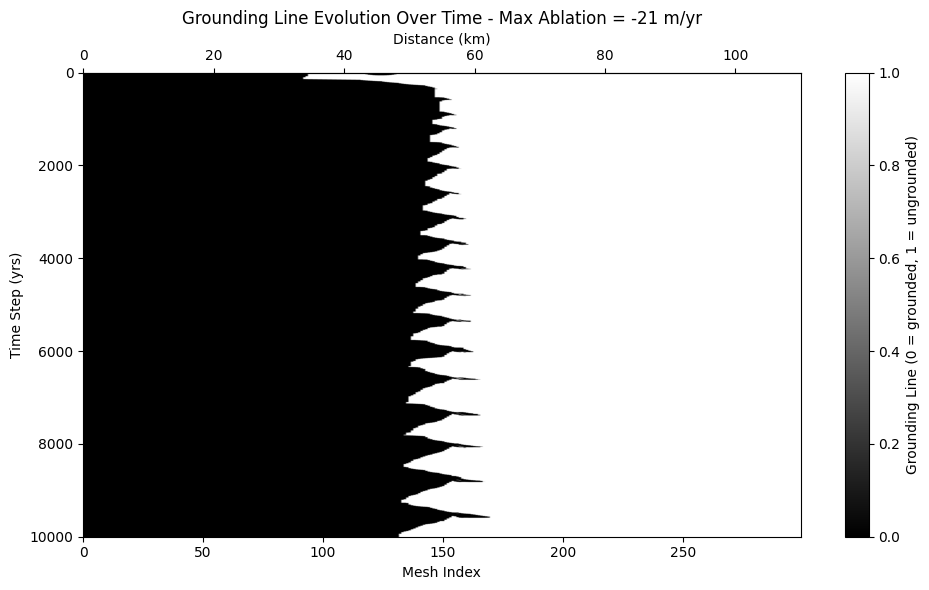

In [196]:
GL_dict = DATA_dict_amin21['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin21)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [197]:
gl_positions_amin21 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin21.append(idx)

gl_positions_amin21 = np.array(gl_positions_amin21)
GL_km_amin21 = mesh_index_to_km(gl_positions_amin21)



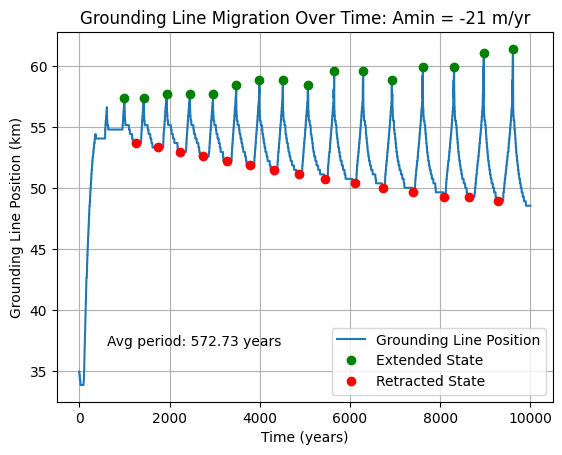

Mean cycle period: 572.73 years
[474.87988793 487.31410889 517.77740443 518.37189875 519.82488989
 522.74141906 565.46759413 582.67492581 650.42051685 636.96496547
 665.89226519 690.15095679 548.1256071  637.57935556]
Mean advance amplitude: 58.95 km
[57.39130435 57.39130435 57.75919732 57.75919732 57.75919732 58.49498328
 58.86287625 58.86287625 58.49498328 59.59866221 59.59866221 58.86287625
 59.96655518 59.96655518 61.07023411 61.43812709]
Mean retreat amplitude: 51.19 km
[53.71237458 53.34448161 52.97658863 52.60869565 52.24080268 51.8729097
 51.50501672 51.13712375 50.76923077 50.40133779 50.03344482 49.66555184
 49.29765886 49.29765886 48.92976589]


In [198]:
peaks_amin21, _ = find_peaks(GL_km_amin21, prominence=3) 
troughs_amin21, _ = find_peaks(-GL_km_amin21, prominence=3)     
periods_amin21 = np.diff(np.array(time)[troughs_amin21])
adv_dists_amin21 = GL_km_amin21[peaks_amin21]
ret_dists_amin21 = GL_km_amin21[troughs_amin21]


plt.plot(time, GL_km_amin21, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin21], GL_km_amin21[peaks_amin21], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin21], GL_km_amin21[troughs_amin21], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin21):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = -21 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin21):.2f} years")
print(periods_amin21)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin21):.2f} km")
print(adv_dists_amin21)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin21):.2f} km")
print(ret_dists_amin21)


13027.974011131862


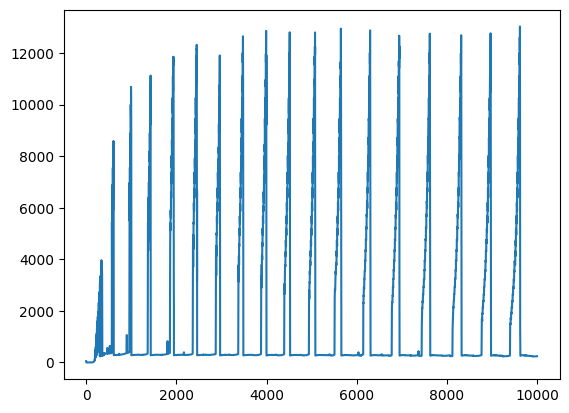

In [199]:
max_Qs_21 = np.array([max(values) for values in Qs_dict.values()])
time_21 = np.array(list(Qs_dict.keys()))

mask = time_21 <= 10000

time_21 = time_21[mask]
max_Qs_21 = max_Qs_21[mask]
plt.plot(time_21, max_Qs_21)
MAX_21 = np.max(max_Qs_21)

MAX_21 = np.max(max_Qs_21)
print(MAX_21)

## Relationship Plots


In [200]:
## Climate Factor##
title_amin_cycles = str("Cycle Frequency: Maximum Ablation")
# amins = np.array([-13, -14, -15, -16, -17, -18, -19, -20, -21])
amins = np.array([13, 14, 15, 16, 17, 18, 19, 20, 21])
amin_cycles = np.array([1, 4, 8, 11, 12, 15, 15, 16, 17])
amin_coeff = np.polyfit(amins,amin_cycles, 1)
p_amin = np.poly1d(amin_coeff)
amin_y_trend = p_amin(amins)
R_2_amin =r2_score(amin_cycles,p_amin(amins))


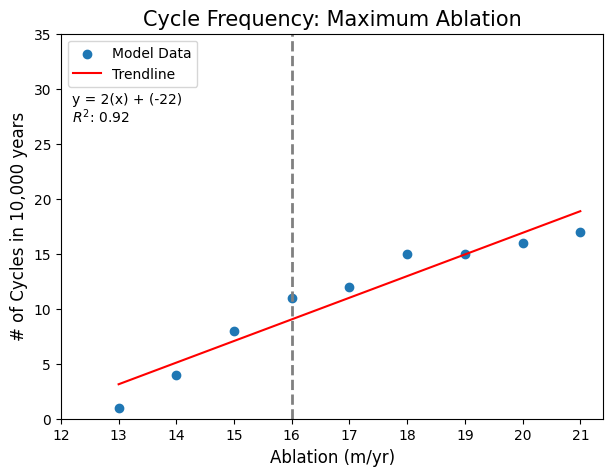

In [201]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.scatter(amins, amin_cycles, label = 'Model Data')
plt.title(title_amin_cycles, fontsize = 15)
plt.plot(amins, amin_y_trend, color='red', label='Trendline')
plt.text(0.02, 0.77, f'$R^2$: {R_2_amin:.2f}', transform=plt.gca().transAxes)
plt.text(0.02, 0.82, f'y = {amin_coeff[0]:.0f}(x) + ({amin_coeff[1]:.0f})', transform=plt.gca().transAxes)
plt.axvline(x=16, color='gray', linestyle='--', linewidth=2)
# plt.xlim(-22,-10)
plt.xlabel("Ablation (m/yr)", fontsize = 12)
plt.ylabel("# of Cycles in 10,000 years", fontsize = 12)
# plt.xticks(np.arange(-22, -12, 1.0))
plt.xticks(np.arange(12, 22, 1.0))
# plt.yticks(np.arange(0, 20, 2.0))
plt.ylim(0,35)
plt.legend(loc = 2)

fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/#ofCycles_Amin.svg", format ="svg", bbox_inches='tight')

Variations in Cycle Period


In [202]:
amins = np.array([14, 15, 16, 17, 18, 19, 20, 21])

# Period_list = [periods_amin21, periods_amin20, periods_amin19, periods_amin18, periods_amin17, periods_amin16, periods_amin15, periods_amin14]
Period_list = [periods_amin21, periods_amin20, periods_amin19, periods_amin18, periods_amin17, periods_amin16, periods_amin15, periods_amin14][::-1]
medians = np.array([np.median(d) for d in Period_list])
print(f"medians:{medians}")
print(f"amins{amins}")

medians = np.array([np.median(d) for d in Period_list])
print(amins)
print(medians)
def exp_decay_fixed(x, a, b, c):
    return a * np.exp(-b * x) + c

c = min(medians)  # Assuming the offset is the minimum of medians
p0 = (max(medians) - c, 1.0, c)

# Try fitting again with scaled amins
popt, pcov = curve_fit(exp_decay_fixed, amins, medians, p0=p0)

# Plotting the results
a, b, c = popt

x_fit = np.linspace(min(amins), max(amins), 500)
y_fit = exp_decay_fixed(x_fit, *popt)


y_pred = exp_decay_fixed(amins, *popt)
r2 = r2_score(medians, y_pred)
print(f"R² = {r2:.3f}")
residuals = medians - y_pred
print(residuals)


medians:[1690.13548029 1138.41298309  857.27437719  741.49291673  626.41273496
  627.10573011  573.02151067  556.79660062]
amins[14 15 16 17 18 19 20 21]
[14 15 16 17 18 19 20 21]
[1690.13548029 1138.41298309  857.27437719  741.49291673  626.41273496
  627.10573011  573.02151067  556.79660062]
R² = 0.998
[  3.44613419  -8.11191661  -7.66093766  23.35122155 -15.20494111
  25.38028856  -7.90797174 -13.29187673]


/tmp/ipykernel_191556/4222216868.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


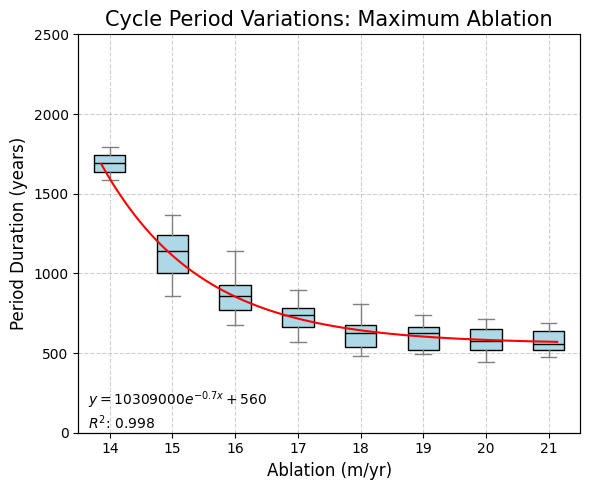

In [203]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations: Maximum Ablation", fontsize = 15)
ax.set_ylabel("Period Duration (years)", fontsize = 12)
ax.set_xlabel("Ablation (m/yr)", fontsize = 12)
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.set_ylim(0,2500)
ax.grid(True, linestyle='--', alpha=0.6)

ax2 = ax.twiny()
ax2.plot(x_fit, y_fit, label="Exponential Fit", color="red")
equation_text = f"$y = {round(a,-3):.0f} e^{{-{b:.1f} x}} + {round(c,-1):.0f}$"
ax2.text(0.02, 0.07, equation_text, transform=plt.gca().transAxes,color='black')
ax2.text(0.02, 0.01, f'$R^2$: {r2:.3f}', transform=plt.gca().transAxes)
ax2.set_xticks([])
ax2.set_xlabel("")
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/PeriodVariation_Amin.svg", format ="svg", bbox_inches='tight')

Variations in GL Extent - Advance 

In [204]:
# ExtPos_list = [adv_dists_amin21, adv_dists_amin20, adv_dists_amin19, adv_dists_amin18, adv_dists_amin17, adv_dists_amin16, adv_dists_amin15, adv_dists_amin14]
ExtPos_list = [adv_dists_amin21, adv_dists_amin20, adv_dists_amin19, adv_dists_amin18, adv_dists_amin17, adv_dists_amin16, adv_dists_amin15, adv_dists_amin14][::-1]

medians = np.array([np.median(d) for d in ExtPos_list])

adv_coeff = np.polyfit(amins,medians, 1)
p_adv = np.poly1d(adv_coeff)
adv_y_trend = p_adv(amins)
R_2_adv =r2_score(medians,p_adv(amins))

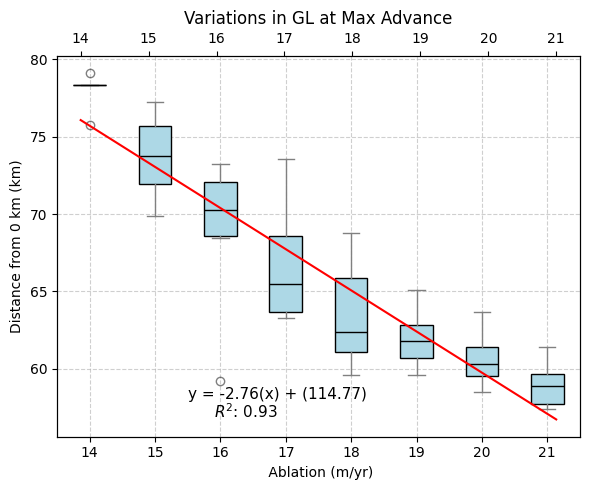

In [205]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Max Advance")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel(" Ablation (m/yr)")
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
# plt.xticks(np.arange(12, 22, 1.0))
ax.grid(True, linestyle='--', alpha=0.6)


ax1 = ax.twiny()
ax1.plot(amins, adv_y_trend, color='red', label='Trendline')
ax1.text(0.3, 0.05, f'$R^2$: {R_2_adv:.2f}', transform=plt.gca().transAxes, fontsize =11)
ax1.text(0.25, 0.1, f'y = {adv_coeff[0]:.2f}(x) + ({adv_coeff[1]:.2f})', transform=plt.gca().transAxes, fontsize =11)

plt.tight_layout()
plt.show()

Variations in GL Extent - Retreat 

In [206]:
RetPos_list =  [ret_dists_amin21, ret_dists_amin20, ret_dists_amin19, ret_dists_amin18, ret_dists_amin17, ret_dists_amin16, ret_dists_amin15, ret_dists_amin14]
RetPos_list =  [ret_dists_amin21, ret_dists_amin20, ret_dists_amin19, ret_dists_amin18, ret_dists_amin17, ret_dists_amin16, ret_dists_amin15, ret_dists_amin14][::-1]
medians = np.array([np.median(d) for d in RetPos_list])

ret_coeff = np.polyfit(amins,medians, 1)
p_ret = np.poly1d(ret_coeff)
ret_y_trend = p_ret(amins)
R_2_ret =r2_score(medians,p_ret(amins))

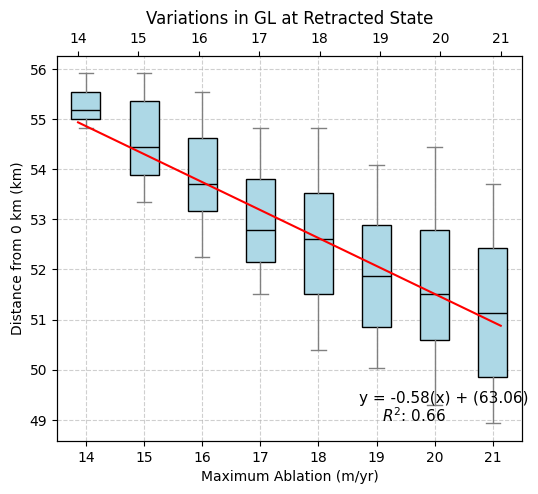

In [207]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Maximum Ablation (m/yr)")
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.grid(True, linestyle='--', alpha=0.6)

ax1 = ax.twiny()
ax1.plot(amins, ret_y_trend, color='red', label='Trendline')
ax1.text(0.7, 0.05, f'$R^2$: {R_2_CF:.2f}', transform=plt.gca().transAxes, fontsize =11)
ax1.text(0.65, 0.1, f'y = {ret_coeff[0]:.2f}(x) + ({ret_coeff[1]:.2f})', transform=plt.gca().transAxes, fontsize =11)

plt.show()

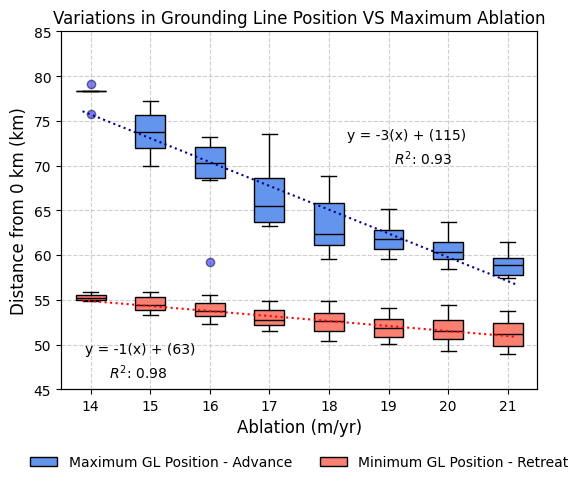

In [217]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='salmon', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='cornflowerblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='blue', alpha=0.5))

ax.set_title("Variations in Grounding Line Position VS Maximum Ablation", fontsize = 12)
ax.set_ylabel("Distance from 0 km (km)", fontsize = 12)
ax.set_xlabel("Ablation (m/yr)", fontsize = 12)
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
ax.set_ylim(45,85)
ax.grid(True, linestyle='--', alpha=0.6)

ax1 = ax.twiny()
ax1.plot(amins, adv_y_trend, color='darkblue', linestyle = 'dotted', label='Trendline')
ax1.plot(amins, ret_y_trend, color='red', linestyle = 'dotted', label='Trendline')

#advance equation
ax1.text(0.6, 0.7, f'y = {adv_coeff[0]:.0f}(x) + ({adv_coeff[1]:.0f})', transform=plt.gca().transAxes)
ax1.text(0.7, 0.63, f'$R^2$: {R_2_adv:.2f}', transform=plt.gca().transAxes)


#retreat equation
ax1.text(0.05, 0.1, f'y = {ret_coeff[0]:.0f}(x) + ({ret_coeff[1]:.0f})', transform=plt.gca().transAxes)
ax1.text(0.1, 0.03, f'$R^2$: {R_2_ret:.2f}', transform=plt.gca().transAxes)
ax1.set_xticks([])
ax1.set_xlabel("")
ax1.spines['top'].set_visible(False)


plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/GLVariation_Amin_EQ.svg", format ="svg", bbox_inches='tight')

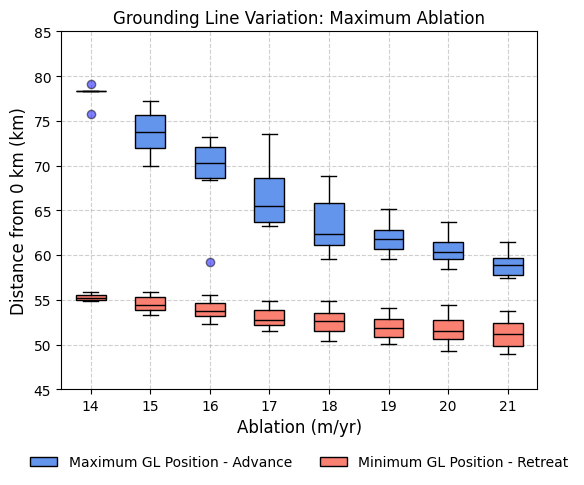

In [215]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='salmon', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='cornflowerblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', markerfacecolor='blue', alpha=0.5))

ax.set_title("Grounding Line Variation: Maximum Ablation", fontsize = 12)
ax.set_ylabel("Distance from 0 km (km)", fontsize = 12)
ax.set_xlabel("Ablation (m/yr)", fontsize = 12)
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(amins) + 1))
ax.set_xticklabels(amins)
plt.ylim(45,85)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/GLVariation_Amin.svg", format ="svg", bbox_inches='tight')

In [210]:
# surf_vels =[us_dict_14,us_dict_15, us_dict_16, us_dict_17, us_dict_18, us_dict_19, us_dict_20,us_dict_21]
# surf_vels =[us_dict_14, us_dict_16, us_dict_18, us_dict_20]
# surf_vels =[us_dict_21, us_dict_20, us_dict_19, us_dict_18, us_dict_17, us_dict_16, us_dict_15,us_dict_14]
surf_vels =[us_dict_20, us_dict_18, us_dict_16, us_dict_14]

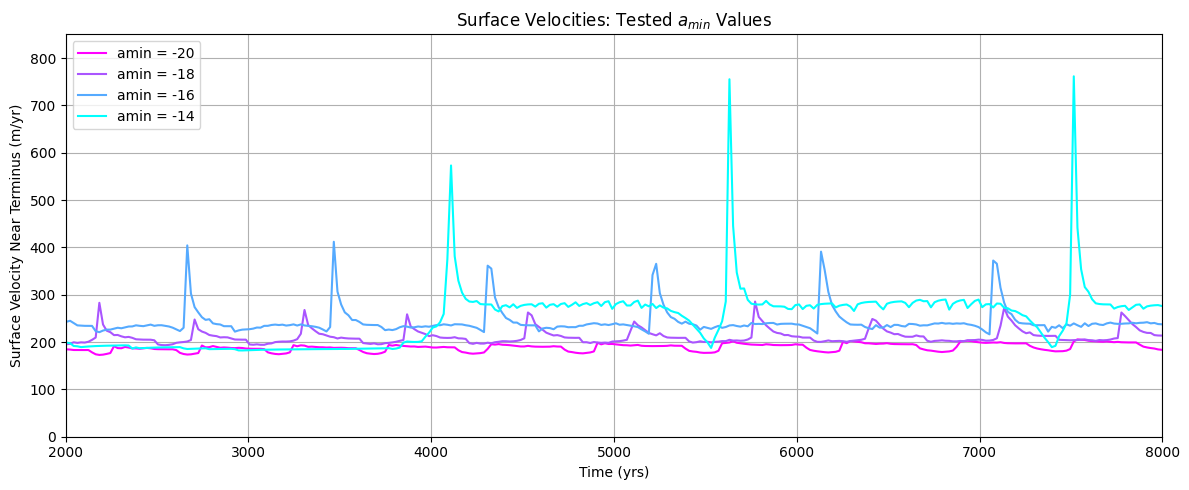

In [211]:
from scipy.interpolate import interp1d

common_times = np.linspace(0, 10000, 500)
colors = plt.cm.cool_r(np.linspace(0, 1, len(surf_vels)))

fig, ax = plt.subplots(figsize=(12, 5))

for i, us_dict in enumerate(surf_vels):
    term_surface_velocity = []
    times = []

    for t in sorted(us_dict.keys()):
        us_ = us_dict[t]
        notNAN = np.where(np.isfinite(us_))[0]

        if len(notNAN) > 0:
            terminus = notNAN[-1]
        else:
            terminus = None

        if terminus is not None and terminus >= 50:
            term_usvel = us_[terminus - 50]
        else:
            term_usvel = 0

        if np.isnan(term_usvel):
            term_usvel = 0

        term_surface_velocity.append(term_usvel)
        times.append(t)

    times = np.array(times)
    term_surface_velocity = np.array(term_surface_velocity)

    # Sort for interpolation
    sorted_indices = np.argsort(times)
    times = times[sorted_indices]
    term_surface_velocity = term_surface_velocity[sorted_indices]

    # Interpolate to common time grid
    interp_func = interp1d(times, term_surface_velocity, bounds_error=False, fill_value="extrapolate")
    interp_speeds = interp_func(common_times)

    plt.plot(common_times, interp_speeds, label=f'amin = {2*i-20}', color=colors[i])

plt.xlabel('Time (yrs)')
plt.ylabel('Surface Velocity Near Terminus (m/yr)')
plt.legend()
plt.xlim(2000,8000)
plt.ylim(0,850)
plt.title('Surface Velocities: Tested $a_{min}$ Values')
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amin/Relationship_Plot/Vel_Amin.svg", format ="svg", bbox_inches='tight')

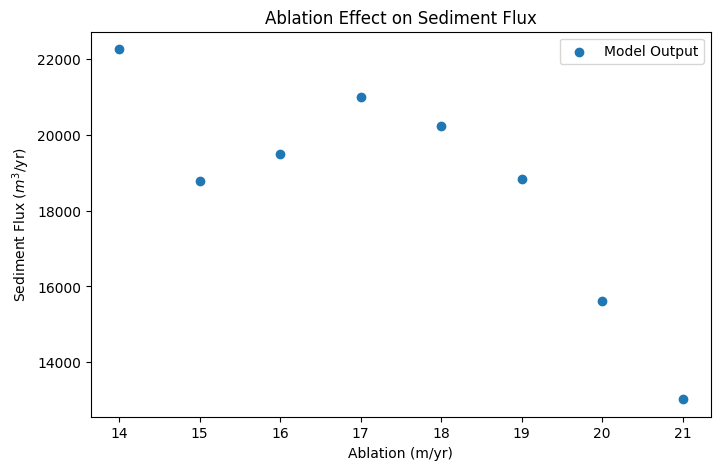

In [212]:
amins = np.array([14, 15, 16, 17, 18, 19, 20, 21])
maxs_Qs = np.array([MAX_14, MAX_15, MAX_16, MAX_17, MAX_18, MAX_19, MAX_20, MAX_21])
CF_coeff = np.polyfit(amins,maxs_Qs, 1)
p_CF = np.poly1d(CF_coeff)
CF_y_trend = p_CF(amins)
R_2_CF =r2_score(maxs_Qs,p_CF(amins))

fig, ax = plt.subplots(figsize=(8, 5))

plt.scatter(amins, maxs_Qs, label = 'Model Output')
# plt.plot(amins, CF_y_trend, color='red', label='Trendline')
# plt.text(0.25, 0.9, f'$R^2$: {R_2_CF:.2f}', transform=plt.gca().transAxes)
# plt.text(0.2, 0.95, f'y = {CF_coeff[0]:.2f}(x) + ({CF_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.xlabel("Ablation (m/yr)")
plt.ylabel("Sediment Flux ($m^{3}$/yr)")
plt.title("Ablation Effect on Sediment Flux")
plt.legend()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/ClimateFactor/Relationship_Plots/CF_vs_Qs.svg", format="svg", bbox_inches='tight')
